In [1]:
from tensorflow.keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

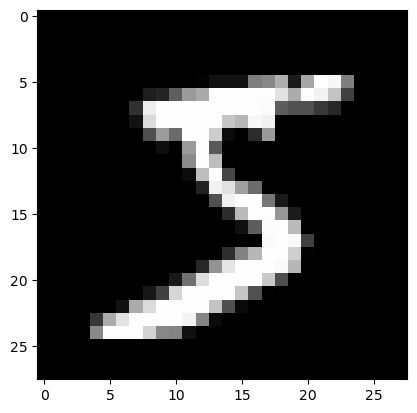

In [2]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.show()

In [3]:
import numpy as np

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))

X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [5]:
# 정답컬럼을 원핫인코딩으로 변환
import pandas as pd
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
h = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2264 - loss: 2.0663 - val_accuracy: 0.5297 - val_loss: 1.4024
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5984 - loss: 1.2511 - val_accuracy: 0.7550 - val_loss: 0.8388
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8135 - loss: 0.7400 - val_accuracy: 0.9079 - val_loss: 0.4683
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9126 - loss: 0.4214 - val_accuracy: 0.9221 - val_loss: 0.3385
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9285 - loss: 0.3111 - val_accuracy: 0.9340 - val_loss: 0.2776
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9381 - loss: 0.2558 - val_accuracy: 0.9408 - val_loss: 0.2436
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9454 - loss: 0.2207 - val_accuracy: 0.9429 - val_loss: 0.2293
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9511 - loss: 0.1941 - val_accuracy: 0.

In [17]:
# data폴더 5.png 파일을 열어서 숫자를 확인하고, 그 숫자를 예측하는 코드를 작성하세요.

from PIL import Image
import numpy as np

# 예측 데이터는 학습데이터와 동일한 형식으로 만들어야함
# 동일한 전처리
# 배경색 글씨색 바꾸기
# 배경을 검은색 글씨를 흰색
# 2차원 > 1차원
# 픽셀값 수정

img = Image.open('DeepLearning/data/5.png')
img = img.resize((28, 28))
img = img.convert('L')
img = np.array(img)
img = img.reshape(1, 784)
img = img.astype(np.float32) / 255

pred = model.predict(img)
print(pred)
print(np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[7.8163130e-06 8.3524847e-06 2.8501216e-03 9.6215552e-01 6.1316852e-04
  2.6824269e-02 3.8877209e-03 2.9833131e-03 4.5349661e-04 2.1624149e-04]]
3


In [18]:
# 활성화 함수 tanh
# 활성화 함수 relu
# 층의 개수는 그대로 두고 units 늘리기
# 중간층 더 많이 쌓기

model2 = Sequential()
model2.add(Input(shape=(784,)))
model2.add(Dense(32, activation='tanh'))
model2.add(Dense(64, activation='tanh'))
model2.add(Dense(128, activation='tanh'))
model2.add(Dense(64, activation='tanh'))
model2.add(Dense(32, activation='tanh'))
model2.add(Dense(16, activation='tanh'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [19]:
h2 = model2.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7934 - loss: 0.8022 - val_accuracy: 0.9350 - val_loss: 0.2410
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9428 - loss: 0.2122 - val_accuracy: 0.9537 - val_loss: 0.1644
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9584 - loss: 0.1514 - val_accuracy: 0.9608 - val_loss: 0.1393
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9660 - loss: 0.1173 - val_accuracy: 0.9622 - val_loss: 0.1375
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9704 - loss: 0.1053 - val_accuracy: 0.9645 - val_loss: 0.1271
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9735 - loss: 0.0933 - val_accuracy: 0.9648 - val_loss: 0.1206
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9755 - loss: 0.0816 - val_accuracy: 0.9648 - val_loss: 0.1264
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9786 - loss: 0.0749 - val_accuracy: 0.

In [20]:
# 예측
pred = model2.predict(img)
print(pred)
print(np.argmax(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[9.19134589e-04 2.43452829e-04 1.11484325e-04 4.65100724e-03
  2.94256188e-06 9.90405500e-01 1.91132538e-03 8.20260902e-04
  7.85737822e-04 1.49072730e-04]]
5
